In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_banknote_authentication.csv')

In [3]:
df.head()

Variance_Wavelet  Skewness_Wavelet  Curtosis_Wavelet  Image_Entropy  Class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0

In [4]:
df.shape

(1372, 5)

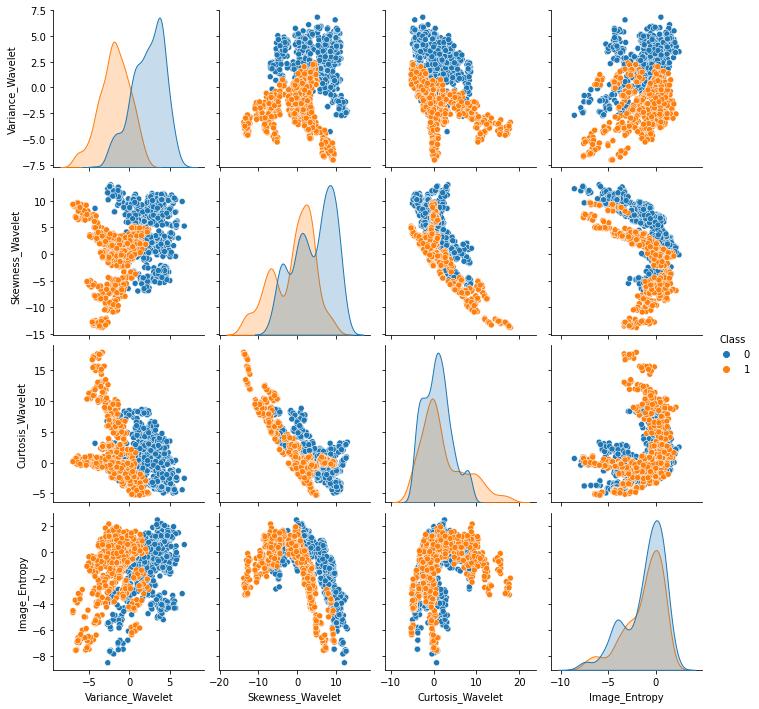

In [5]:
sns.pairplot(df, hue='Class')

In [6]:
X=df.drop('Class',axis=1)

In [7]:
y=df['Class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15, random_state=101)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [13]:
n_estimators=[64,100,128,200]

In [14]:
max_features=[2,3,4]

In [15]:
bootstrap=[True, False]

In [16]:
oob_score=[True, False]

In [23]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'bootstrap':bootstrap,
           'oob_score':oob_score}

In [24]:
rfc=RandomForestClassifier()

In [25]:
grid=GridSearchCV(rfc, param_grid)

In [26]:
grid.fit(X_train,y_train)

C:\Users\owner\anaconda\New folder\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\owner\anaconda\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\owner\anaconda\New folder\lib\site-packages\sklearn\ensemble\_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_m

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [27]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [29]:
rfc=RandomForestClassifier(max_features=2, n_estimators=200,
                          oob_score=True)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [31]:
rfc.oob_score_

0.9914236706689536

In [32]:
prediction=rfc.predict(X_test)

In [37]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [34]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



C:\Users\owner\anaconda\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


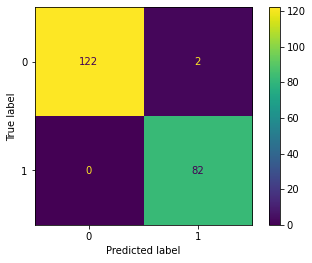

In [35]:
plot_confusion_matrix(rfc,X_test,y_test)

C:\Users\owner\anaconda\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


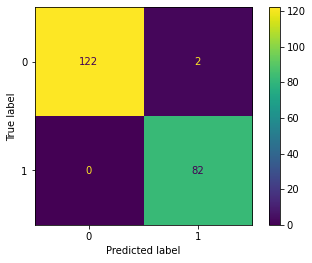

In [36]:
plot_confusion_matrix(grid,X_test,y_test)

In [41]:
errors=[]
miscalculation=[]

for n in range(1,200):
    
    rfc=RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train,y_train)
    pred=rfc.predict(X_test)
    err=1-accuracy_score(y_test,pred)
    missed=np.sum(pred!=y_test)
    
    errors.append(err)
    miscalculation.append(missed)

In [40]:
np.sum(prediction!=y_test)

2

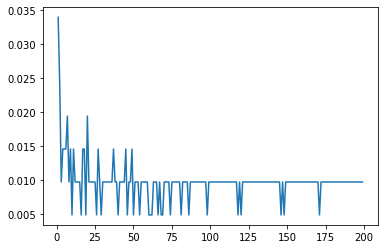

In [42]:
plt.plot(range(1,200),errors)

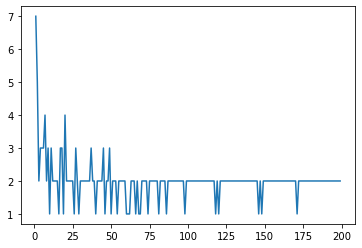

In [43]:
plt.plot(range(1,200),miscalculation)